<a href="https://colab.research.google.com/github/Sudhir22/Big-Game-Prediction/blob/master/Model_Tree%2BForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q xlrd
!git clone https://github.com/Sudhir22/Big-Game-Prediction.git

Cloning into 'Big-Game-Prediction'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [2]:
pip install catboost

     |████████████████████████████████| 64.0MB 66kB/s 


In [0]:
import pandas as pd
import xgboost as xbg
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [0]:
train_data=pd.read_csv('Big-Game-Prediction/train.csv')

In [6]:
train_data.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,6056
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,9702
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,1745
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,4757
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,7242


In [0]:
train_data['Team_Value']=pd.Categorical(train_data['Team_Value'])
train_data['Team_Value']=train_data['Team_Value'].cat.codes
train_data['Playing_Style']=pd.Categorical(train_data['Playing_Style'])
train_data['Playing_Style']=train_data['Playing_Style'].cat.codes
train_data['Number_Of_Injured_Players']=pd.Categorical(train_data['Number_Of_Injured_Players'])
train_data['Number_Of_Injured_Players']=train_data['Number_Of_Injured_Players'].cat.codes
train_data['Coach_Experience_Level']=pd.Categorical(train_data['Coach_Experience_Level'])
train_data['Coach_Experience_Level']=train_data['Coach_Experience_Level'].cat.codes

In [0]:
def mean_encoding(column):
  mean_dict=dict()
  for index,row in train_data.groupby([column]):
    mean_dict[index]=(row['Won_Championship'].sum()/row.shape[0]*1.0)
  
  return mean_dict

  


In [0]:
team_value_mean=mean_encoding("Team_Value")
playing_style_mean=mean_encoding("Playing_Style")
no_of_injured_players_mean=mean_encoding("Number_Of_Injured_Players")
coach_experience_level_mean=mean_encoding("Coach_Experience_Level")


In [0]:
team_value_mean_data=list()
playing_style_mean_data=list()
no_of_injured_players_mean_data=list()
coach_experience_level_mean_data=list()
for index,row in train_data.iterrows():
  team_value_mean_data.append(team_value_mean[row['Team_Value']])
  playing_style_mean_data.append(playing_style_mean[row['Playing_Style']])
  no_of_injured_players_mean_data.append(no_of_injured_players_mean[row['Number_Of_Injured_Players']])
  coach_experience_level_mean_data.append(coach_experience_level_mean[row['Coach_Experience_Level']])

In [0]:
train_data['Team_Value_Mean']=pd.Series(team_value_mean_data)
train_data['Playing_Style_Mean']=pd.Series(playing_style_mean_data)
train_data['Number_Of_Injured_Players_Mean']=pd.Series(no_of_injured_players_mean_data)
train_data['Coach_Experience_Level_Mean']=pd.Series(coach_experience_level_mean_data)

In [0]:
data_corr=train_data.corr()

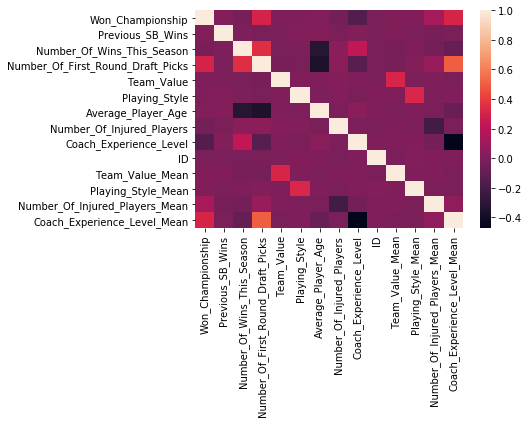

In [16]:
sns.heatmap(data_corr)

In [17]:
train_data.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID,Team_Value_Mean,Playing_Style_Mean,Number_Of_Injured_Players_Mean,Coach_Experience_Level_Mean
0,0,3,13,2,1,2,27,1,2,6056,0.503899,0.503439,0.557022,0.490299
1,0,2,14,2,1,1,26,1,2,9702,0.503899,0.475336,0.557022,0.490299
2,1,2,13,1,1,0,27,2,2,1745,0.503899,0.500000,0.457437,0.490299
3,0,2,12,2,0,2,27,6,2,4757,0.485356,0.503439,0.536965,0.490299
4,0,1,15,2,1,2,26,1,2,7242,0.503899,0.503439,0.557022,0.490299


In [19]:
X=train_data.iloc[:,[1,2,3,6,10,11,12,13]]
X.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,Team_Value_Mean,Playing_Style_Mean,Number_Of_Injured_Players_Mean,Coach_Experience_Level_Mean
0,3,13,2,27,0.503899,0.503439,0.557022,0.490299
1,2,14,2,26,0.503899,0.475336,0.557022,0.490299
2,2,13,1,27,0.503899,0.500000,0.457437,0.490299
3,2,12,2,27,0.485356,0.503439,0.536965,0.490299
4,1,15,2,26,0.503899,0.503439,0.557022,0.490299


In [0]:
Y=train_data.iloc[:,0]

In [0]:
kf=KFold(n_splits=5)

In [0]:
param = {
    'eta': 0.2, 
    'max_depth': 100,  
    'objective': 'binary:logistic',  
    'gamma': 0.01} 

steps = 1000  # The number of training iterations

In [0]:
for x,y in kf.split(X):
  '''X_train,X_test = X.iloc[x,:],X.iloc[y,:]
  Y_train,Y_test = Y[x],Y[y]
  D_train = xbg.DMatrix(X_train, label=Y_train)
  D_test = xbg.DMatrix(X_test, label=Y_test)
  model = xbg.train(param, D_train, steps)
  preds = model.predict(D_test)
  best_preds = np.asarray([np.argmax(line) for line in preds])


  print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
  print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
  print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
  print("F1-score = {}".format(f1_score(Y_test,best_preds,average='weighted')))
  print("********************************************************************")'''

  '''model1=MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,alpha=0.01,activation='relu')
  model1.fit(X_train,Y_train)
  best_preds_nn=model1.predict(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_nn,average='weighted')))'''

  model2=SVC(C=100,kernel='poly',gamma='auto')
  model2.fit(X_train,Y_train)
  best_preds_svm = model2.predict(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_svm,average='weighted')))

  '''model3=CatBoostClassifier(iterations=1000,learning_rate=0.01,depth=12,loss_function='MultiClass',verbose=False)
  model3.fit(X_train,Y_train)
  best_preds_cat=model3.predict(X_test)
  preds_cat=model3.predict_proba(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_cat,average='weighted')))


  average_preds=(np.array(preds)+np.array(preds_cat))/2.0
  best_preds_average = np.asarray([np.argmax(line) for line in average_preds])
  print("F1-score = {}".format(f1_score(Y_test,best_preds_average,average='weighted')))'''

  model4=DecisionTreeClassifier(max_depth=1000)
  model4.fit(X_train,Y_train)

  best_preds_tree=model4.predict(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_tree,average='binary')))

  model5=RandomForestClassifier(n_estimators=100,min_samples_split=5,warm_start=True)

  model5.fit(X_train,Y_train)

  best_preds_forest=model5.predict(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_forest,average='binary')))


  


In [0]:
test_data=pd.read_csv("Big-Game-Prediction/test.csv")

In [26]:
test_data.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,3,16,2,Above_Four_Billion,Relaxed,26,two,Intermediate,1
1,2,15,3,Less_Than_Four_Billion,Balanced,26,six,Advanced,5
2,2,10,1,Less_Than_Four_Billion,Balanced,27,nine,Beginner,6
3,3,14,3,Less_Than_Four_Billion,Balanced,26,seven,Intermediate,7
4,3,13,2,Less_Than_Four_Billion,Balanced,27,three,Intermediate,9


In [0]:
test_data['Team_Value']=pd.Categorical(test_data['Team_Value'])
test_data['Team_Value']=test_data['Team_Value'].cat.codes
test_data['Playing_Style']=pd.Categorical(test_data['Playing_Style'])
test_data['Playing_Style']=test_data['Playing_Style'].cat.codes
test_data['Number_Of_Injured_Players']=pd.Categorical(test_data['Number_Of_Injured_Players'])
test_data['Number_Of_Injured_Players']=test_data['Number_Of_Injured_Players'].cat.codes
test_data['Coach_Experience_Level']=pd.Categorical(test_data['Coach_Experience_Level'])
test_data['Coach_Experience_Level']=test_data['Coach_Experience_Level'].cat.codes

In [0]:
team_value_mean_data=list()
playing_style_mean_data=list()
no_of_injured_players_mean_data=list()
coach_experience_level_mean_data=list()
for index,row in test_data.iterrows():
  team_value_mean_data.append(team_value_mean[row['Team_Value']])
  playing_style_mean_data.append(playing_style_mean[row['Playing_Style']])
  no_of_injured_players_mean_data.append(no_of_injured_players_mean[row['Number_Of_Injured_Players']])
  coach_experience_level_mean_data.append(coach_experience_level_mean[row['Coach_Experience_Level']])

In [0]:
test_data['Team_Value_Mean']=pd.Series(team_value_mean_data)
test_data['Playing_Style_Mean']=pd.Series(playing_style_mean_data)
test_data['Number_Of_Injured_Players_Mean']=pd.Series(no_of_injured_players_mean_data)
test_data['Coach_Experience_Level_Mean']=pd.Series(coach_experience_level_mean_data)

In [30]:
test_data.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID,Team_Value_Mean,Playing_Style_Mean,Number_Of_Injured_Players_Mean,Coach_Experience_Level_Mean
0,3,16,2,0,3,26,9,2,1,0.485356,0.503030,0.256410,0.490299
1,2,15,3,1,2,26,6,0,5,0.503899,0.503439,0.536965,0.886905
2,2,10,1,1,2,27,3,1,6,0.503899,0.503439,0.136364,0.195846
3,3,14,3,1,2,26,5,2,7,0.503899,0.503439,0.487654,0.490299
4,3,13,2,1,2,27,8,2,9,0.503899,0.503439,0.376093,0.490299


In [0]:
test_X=test_data.iloc[:,[0,1,2,5,9,10,11,12]]

In [32]:
test_X.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,Team_Value_Mean,Playing_Style_Mean,Number_Of_Injured_Players_Mean,Coach_Experience_Level_Mean
0,3,16,2,26,0.485356,0.503030,0.256410,0.490299
1,2,15,3,26,0.503899,0.503439,0.536965,0.886905
2,2,10,1,27,0.503899,0.503439,0.136364,0.195846
3,3,14,3,26,0.503899,0.503439,0.487654,0.490299
4,3,13,2,27,0.503899,0.503439,0.376093,0.490299


In [33]:
test_X.shape

(3500, 8)

In [0]:
#D_test_test=xbg.DMatrix(test_X)
best_test_preds = model5.predict(test_X)
#best_test_preds = np.asarray([np.argmax(line) for line in test_preds])

In [0]:
test_preds.shape

(2500, 4)

In [0]:
severity_dict={1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'}

In [0]:
severity_list=list()
for x in best_test_preds:
  severity_list.append(severity_dict[x])

In [0]:
test_data['Won_Championship']=pd.Series(best_test_preds)

In [0]:
test_data[['ID','Won_Championship']].to_csv("Big-Game-Prediction/submission3.csv",index=False)